# Plan:
- make graphs from a .csv (a simpler version of speadsheet and askin to text file)
- use Python and Pandas library to clean data, explore and make simple graph
- work with built-in function to discover statistics

# Before you start:
- this Jupyter notebook, code, and software were prepared using `Ubuntu 18.04LTS`, `Python3.6.9`
- If you are using Windows, or even a Mac, I recommend to jump on [Anaconda](https://www.anaconda.com/products/individual) suite. Scroll to the bottom of the page, you will see the package for your system. Select `Graphic` option to make your life a bit easier (for now).

# Prepare folder structure
- all data file is stored in `data` folder

In [1]:
import os # to create folder, right click `Create Folder` works

In [3]:
# current folder structure in top layer 
os.listdir()

['README.md',
 'Basic-display-data.ipynb',
 '.gitignore',
 '.git',
 '.ipynb_checkpoints']

In [4]:
if 'data' not in os.listdir():
    os.makedirs('data')
else:
    print('folder named data existed')

In [7]:
# also create `graph, img` folders
[os.makedirs(folder) for folder in ['graph', 'img'] if folder not in os.listdir()] #list comprehension

[None, None]

In [8]:
# check again and a folder name data existed
os.listdir()

['img',
 'README.md',
 'data',
 'Basic-display-data.ipynb',
 'graph',
 '.gitignore',
 '.git',
 '.ipynb_checkpoints']

# Download CSV files
- let work with `AirNow.gov`'s data archived by years and up-to-date.
![Maps](./img/airmonitors_location.png)

- Click to one location (**Hanoi**), a list of CSV files under *Historical* tab blow the map
```
2015 PM2.5 MTD
2015 PM2.5
2016 PM2.5 MTD
2016 PM2.5
2017 PM2.5 MTD
2017 PM2.5
2018 PM2.5 MTD
2018 PM2.5
2019 PM2.5 MTD
2019 PM2.5
2020 PM2.5 MTD
2020 PM2.5 YTD
```
- and the link to a file `http://dosairnowdata.org/dos/historical/Hanoi/2016/Hanoi_PM2.5_2016_12_MTD.csv`
- [Ref: Airnow.gov](https://www.airnow.gov/international/us-embassies-and-consulates/)

In [12]:
# let get year contain the whole year. For Hanoi, I selected 2018. 
# Right click and Save As `data` folder or
!wget http://dosairnowdata.org/dos/historical/Hanoi/2018/Hanoi_PM2.5_2018_YTD.csv -P ./data/

--2020-07-20 10:33:08--  http://dosairnowdata.org/dos/historical/Hanoi/2018/Hanoi_PM2.5_2018_YTD.csv
Resolving dosairnowdata.org (dosairnowdata.org)... 74.208.236.6, 2607:f1c0:100f:f000::279
Connecting to dosairnowdata.org (dosairnowdata.org)|74.208.236.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862331 (842K) [text/csv]
Saving to: ‘./data/Hanoi_PM2.5_2018_YTD.csv’

Hanoi_PM2.5_2018_YT 100%[===================>] 842.12K   498KB/s    in 1.7s    

2020-07-20 10:33:10 (498 KB/s) - ‘./data/Hanoi_PM2.5_2018_YTD.csv’ saved [862331/862331]



In [14]:
# check to see if the file is in data
os.listdir('./data')

['Hanoi_PM2.5_2018_YTD.csv']

## Why I downloaded the file?
- The file is available in your local drive, you can examine by text editor or Excel-liked program 
- Reduce load on the server, especially when one first tries out the code unintentionally request one file multiple times
- Alternatively, a `csv` file can be read directly into a `DataFrame` (similar to a `Sheet`) by `pandas`

# Explore file by Pandas
- [pandas](https://pandas.pydata.org/) Python Data Analysis Library is a must-have tool to work with tabular data
- Install library (on linux or Mac), assumed you have `pip` installed

```
pip install pandas --user# process tatular data
pip install matplotlib --user #powerful to make graph
pip install seaborn --user # make the graph look good

```

In [79]:
# import pandas
import pandas as pd
# load the data in the memory
df = pd.read_csv('./data/Hanoi_PM2.5_2018_YTD.csv')

In [22]:
# let see the first 5 row of the file
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Hanoi,PM2.5 - Principal,2018-01-01 01:00 AM,2018,1,1,1,68.9,158,Unhealthy,69.2,UG/M3,1 Hr,Valid
1,Hanoi,PM2.5 - Principal,2018-01-01 02:00 AM,2018,1,1,2,72.2,160,Unhealthy,75.5,UG/M3,1 Hr,Valid
2,Hanoi,PM2.5 - Principal,2018-01-01 03:00 AM,2018,1,1,3,81.2,164,Unhealthy,90.2,UG/M3,1 Hr,Valid
3,Hanoi,PM2.5 - Principal,2018-01-01 04:00 AM,2018,1,1,4,89.4,169,Unhealthy,97.6,UG/M3,1 Hr,Valid
4,Hanoi,PM2.5 - Principal,2018-01-01 05:00 AM,2018,1,1,5,89.2,168,Unhealthy,89.1,UG/M3,1 Hr,Valid


In [24]:
# `.info` can be handy for high-level summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 14 columns):
Site             8339 non-null object
Parameter        8339 non-null object
Date (LT)        8339 non-null object
Year             8339 non-null int64
Month            8339 non-null int64
Day              8339 non-null int64
Hour             8339 non-null int64
NowCast Conc.    8339 non-null float64
AQI              8339 non-null int64
AQI Category     8100 non-null object
Raw Conc.        8339 non-null float64
Conc. Unit       8339 non-null object
Duration         8339 non-null object
QC Name          8339 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 912.2+ KB


- there is many conlumns included for its completedness. such as `Site`, `Parameter`, `Conc.(entration) Unit`...
- Most columns contain 8339 rows, AQI Category has 8100 rows. The lesser row is resulted from the method to calculate AQI (Air Quality Index), a final number for public.
- Three important columns are `Date (LT)`, `Raw Conc.`, `QC Name`. Other columns are derived from these three columns.

In [25]:
# to have a look at the distribution (statistic)
df.describe()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
count,8339.000000,8339.000000,8339.000000,8339.000000,8339.000000,8339.000000,8339.000000
mean,2018.000120,6.584123,15.971939,11.561338,10.679398,70.699125,22.647859
std,0.010951,3.485221,8.801531,6.907012,175.955430,188.781578,139.447799
min,2018.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000
25%,2018.000000,4.000000,8.000000,6.000000,19.000000,66.000000,18.850000
50%,2018.000000,7.000000,16.000000,12.000000,31.300000,91.000000,31.700000
75%,2018.000000,10.000000,24.000000,18.000000,49.900000,136.000000,51.800000
max,2019.000000,12.000000,31.000000,23.000000,235.800000,286.000000,323.000000


- only numeric columns are listed here
- notice `-999` in Conc columns
- for summary statistics, this table is already overwhelming
- the mean (raw) concentration is `22 microgram/cubic meter`, did you spot what is wrong with this number?
- 50% label is called `median`, a value of concentration (for example) that devided the sample pool into two, so that 50 percent of the sample is smaller than the median (18.85), and 50% is larger the medium.
- the median is lower than the mean (average), why is that?

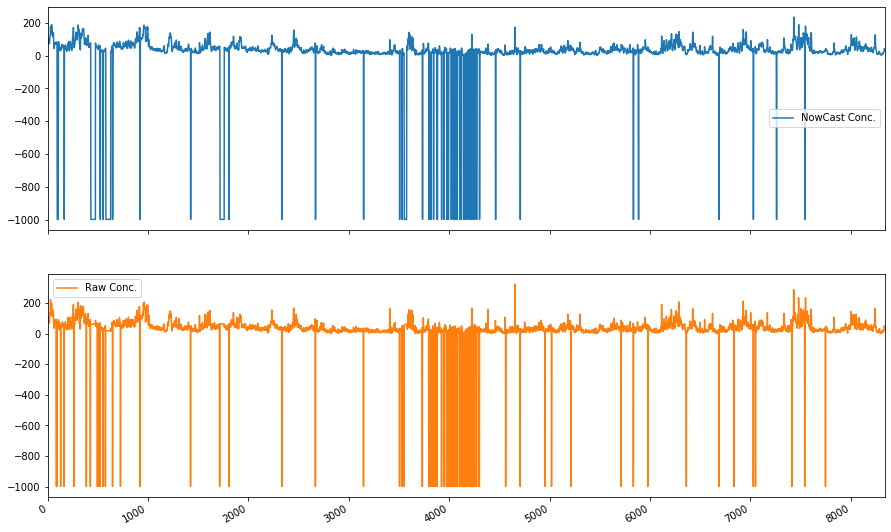

In [26]:
# let visualize to concentration, use the .plot function from pandas, 
# I used subplots=True to separate two graphs, and figsize=(15,6) indicate the size of the graph
df[['NowCast Conc.', 'Raw Conc.']].plot(subplots=True, figsize=(15,10));

- uhm, this is not really make the data is easier to see the trend, 
- the `-999`s make the graph skewed and cannot see the trend.
- Make a quick fix

In [32]:
df.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')

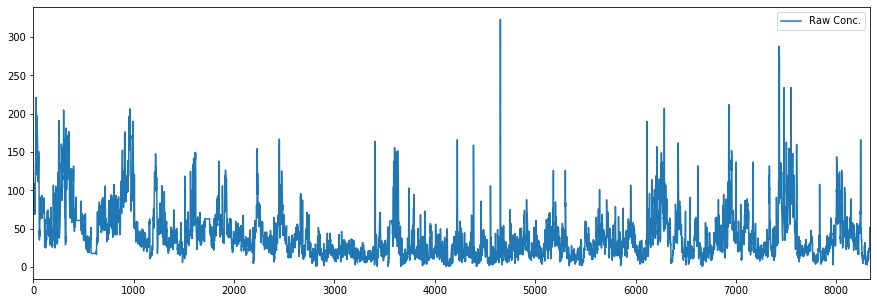

In [71]:
df[df['Raw Conc.'] > 0]['Raw Conc.'].plot(figsize=(15,5), legend=True)

- this techniue is called `filtering`
- first `df['Raw Conc.'] > 0` yield a table with `False` or `True` value for each cell
- only cells wiht `True` value selected by `df[df['Raw Conc.']`
- Next the column `Raw Conc.` is selected by `df[df['Raw Conc.']['Raw Conc.']`
- finally, `plot` function is called to display to clean data

# Make data is more insightful


## Make the timeseries data
- convert a string represented date and time to a `datetime` object
- set the datetime as the index
- remove redundant columns

In [80]:
# convert string to datetime and set this column as the index
df['Date (LT)'] = pd.to_datetime(df['Date (LT)'])
# set a column as the index
df.set_index('Date (LT)', inplace=True)
df.head()

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
Date (LT),,,,,,,,,,,,,
2018-01-01 01:00:00,Hanoi,PM2.5 - Principal,2018,1,1,1,68.9,158,Unhealthy,69.2,UG/M3,1 Hr,Valid
2018-01-01 02:00:00,Hanoi,PM2.5 - Principal,2018,1,1,2,72.2,160,Unhealthy,75.5,UG/M3,1 Hr,Valid
2018-01-01 03:00:00,Hanoi,PM2.5 - Principal,2018,1,1,3,81.2,164,Unhealthy,90.2,UG/M3,1 Hr,Valid
2018-01-01 04:00:00,Hanoi,PM2.5 - Principal,2018,1,1,4,89.4,169,Unhealthy,97.6,UG/M3,1 Hr,Valid
2018-01-01 05:00:00,Hanoi,PM2.5 - Principal,2018,1,1,5,89.2,168,Unhealthy,89.1,UG/M3,1 Hr,Valid


In [91]:
# check data type, the index has `DatetimeIndex`
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8339 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 6 columns):
Month            8339 non-null int64
NowCast Conc.    8339 non-null float64
AQI              8339 non-null int64
AQI Category     8100 non-null object
Raw Conc.        8339 non-null float64
QC Name          8339 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 456.0+ KB


In [115]:
df = dfs.copy(deep=True)

In [116]:
# remove first 5 columns and two columns near the last one
# inplace=True specifies the change (remove columns) in df object
df.drop(columns=['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'Conc. Unit', 'Duration'], inplace=True)
df.head()

,NowCast Conc.,AQI,AQI Category,Raw Conc.,QC Name
Date (LT),,,,,
2018-01-01 01:00:00,68.9,158,Unhealthy,69.2,Valid
2018-01-01 02:00:00,72.2,160,Unhealthy,75.5,Valid
2018-01-01 03:00:00,81.2,164,Unhealthy,90.2,Valid
2018-01-01 04:00:00,89.4,169,Unhealthy,97.6,Valid
2018-01-01 05:00:00,89.2,168,Unhealthy,89.1,Valid


In [117]:
# filter the data and assign the cleaned DataFrame to df2
df2 = df[df['Raw Conc.']>=0]
df2.describe()

,NowCast Conc.,AQI,Raw Conc.
count,8190.000000,8190.000000,8190.000000
mean,10.626288,70.710134,40.752259
std,176.425577,189.279538,31.456565
min,-999.000000,-999.000000,0.000000
25%,19.000000,66.000000,19.000000
50%,31.400000,92.000000,32.000000
75%,50.075000,137.000000,52.000000
max,235.800000,286.000000,323.000000


- `-999` values are removed from `Raw Conc.` columns, but some are still in the `AQI` and `NowCast Conc.`
- less rows in `df2` (8190) vs. 8339 in `df`
- the mean value for concentration is 40.7 (ug/m3), and the median is 32 (ug/m3) in cleaned version (in `df`, the mean value `22.6` (ug/m3)
- small mistakes could lead to an inaccurate results, and a wrong interpretation (ie. mean, median)

In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 5 columns):
NowCast Conc.    8190 non-null float64
AQI              8190 non-null int64
AQI Category     7954 non-null object
Raw Conc.        8190 non-null float64
QC Name          8190 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 383.9+ KB


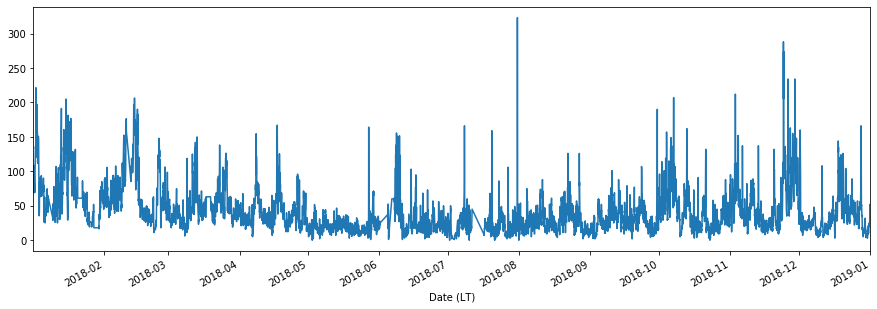

In [95]:
# let see concentration in 2018 with timeseris
df2['Raw Conc.'].plot(figsize=(15,5))

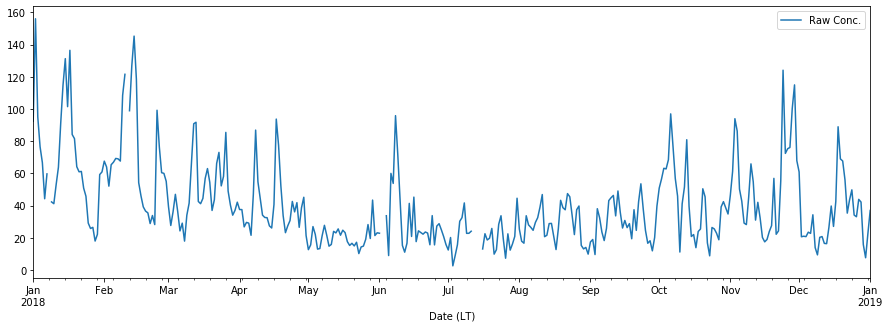

In [110]:
# a daily average could make the graph less messy
df2[['Raw Conc.']].resample('1D').mean().plot(figsize=(15,5), kind='line')

- PM2.5 or particulate mattters that has a diameter of 2.5 micrometer or less is one of outdoor pollutant regulated 
- depend on the country, the standard (or recommendation) of daily concentration is different 
- The recommendation of WHO is [25 &mu;g/m<sup>3</sup>](https://apps.who.int/iris/bitstream/handle/10665/69477/WHO_SDE_PHE_OEH_06.02_eng.pdf) daily average, [35 &mu;g/m<sup>3</sup>](https://www.epa.gov/pm-pollution/2006-national-ambient-air-quality-standards-naaqs-particulate-matter-pm25) by US EPA, and [50 &mu;g/m<sup>3</sup>](https://www.env.go.jp/air/tech/ine/asia/vietnam/files/law/QCVN%2005-2013.pdf) by Vietname Environmental Administration


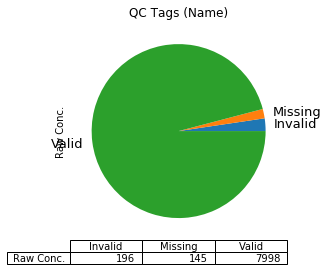

In [131]:
# before moving on the make the graph more useful, let look as the Quality Control (QC) of the raw data
# for environmnetal data, a valid QC (about 98%) is solid
df.groupby('QC Name')['Raw Conc.'].count().plot.pie(title='QC Tags (Name)',table=True, fontsize=13)

In [128]:
# let save clean file back to local drive
df2.to_csv('./data/cleaned_Hanoi_PM2.5_2018_YTD.csv')

In [ ]:
# 

In [83]:
df.describe()

,Month,NowCast Conc.,AQI,Raw Conc.
count,8339.000000,8339.000000,8339.000000,8339.000000
mean,6.584123,10.679398,70.699125,22.647859
std,3.485221,175.955430,188.781578,139.447799
min,1.000000,-999.000000,-999.000000,-999.000000
25%,4.000000,19.000000,66.000000,18.850000
50%,7.000000,31.300000,91.000000,31.700000
75%,10.000000,49.900000,136.000000,51.800000
max,12.000000,235.800000,286.000000,323.000000
